# logistic reg 
used to solve classification problm and wreak by confusion matrix

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
%matplotlib inline

In [7]:
train=pd.read_csv('train.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

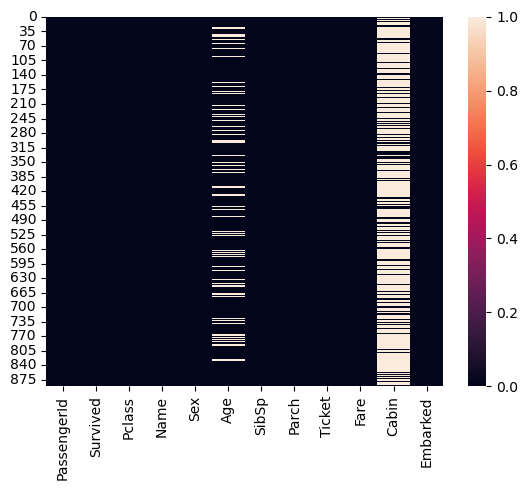

In [ ]:

sns.heatmap(train.isna())

<Axes: >

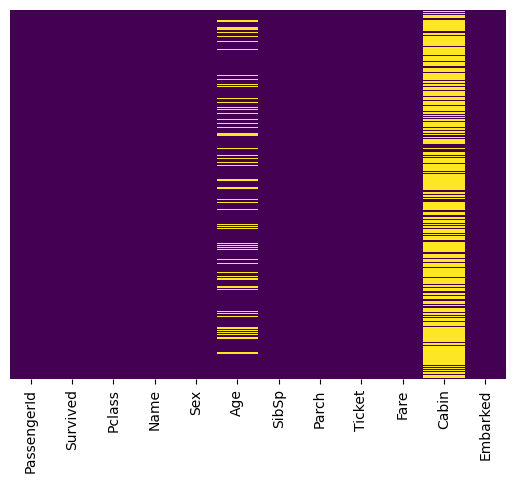

In [ ]:
sns.heatmap(train.isna(),yticklabels=False,cbar=False,cmap='viridis')


In [12]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

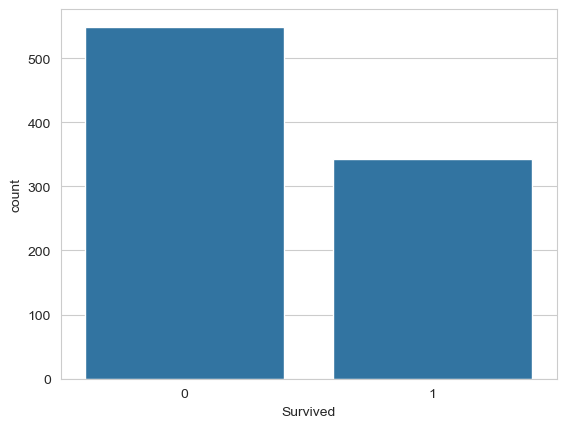

In [14]:
sns.countplot(x='Survived',data=train)
# 0- not survived
# 1 - survived

<Axes: xlabel='Survived', ylabel='count'>

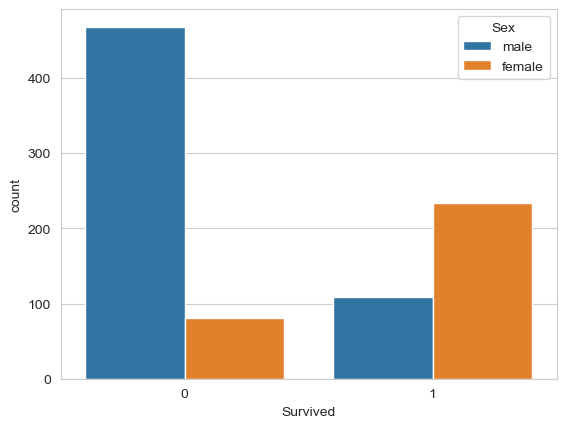

In [ ]:
sns.countplot(x='Survived',hue='Sex',data=train)


<Axes: xlabel='Survived', ylabel='count'>

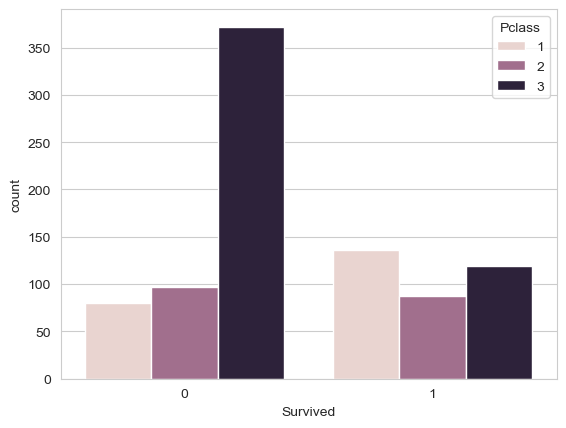

In [16]:
sns.countplot(x='Survived',hue='Pclass',data=train)

C:\Users\FatimaTasneem\AppData\Local\Temp\ipykernel_11976\3454371955.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

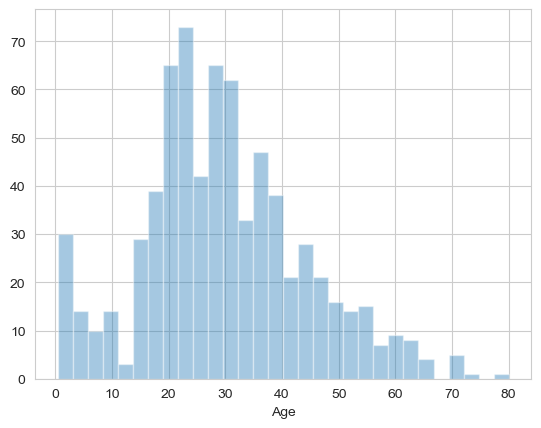

In [17]:
# to see age we will do dist plot
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<Axes: ylabel='Frequency'>

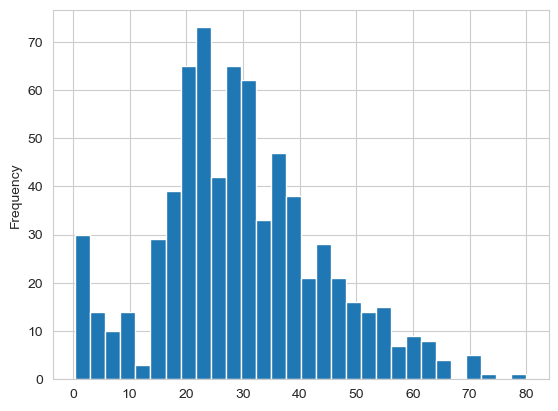

In [18]:
# another way of this plot
train['Age'].plot.hist(bins=30)

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: xlabel='SibSp', ylabel='count'>

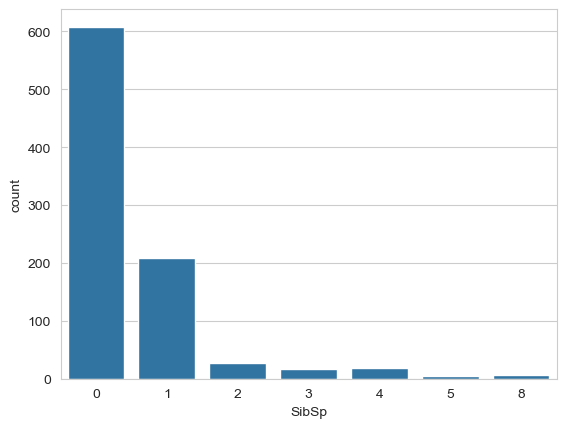

In [20]:
# sibsp-> no of siblings or spouse on board
sns.countplot(x='SibSp',data=train)

In [21]:
train['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: >

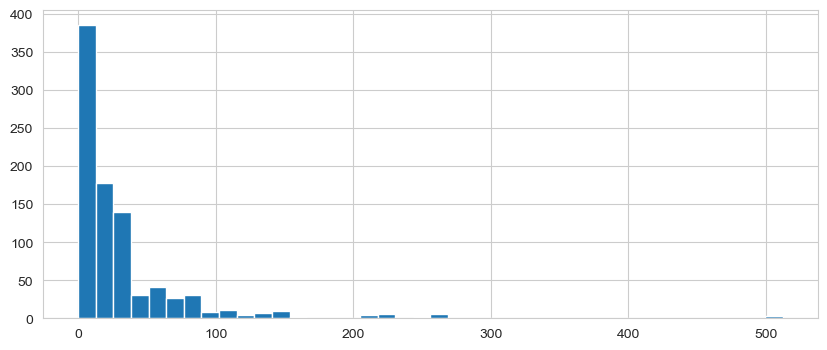

In [22]:
train['Fare'].hist(bins=40,figsize=(10,4))

In [23]:
# how to do these plots with cufflinks

In [24]:
import cufflinks as cf

In [25]:
cf.go_offline()

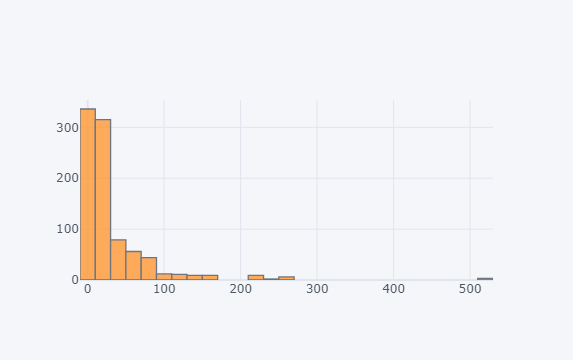

In [26]:
train['Fare'].iplot(kind='hist',bins=30)

<Axes: xlabel='Pclass', ylabel='Age'>

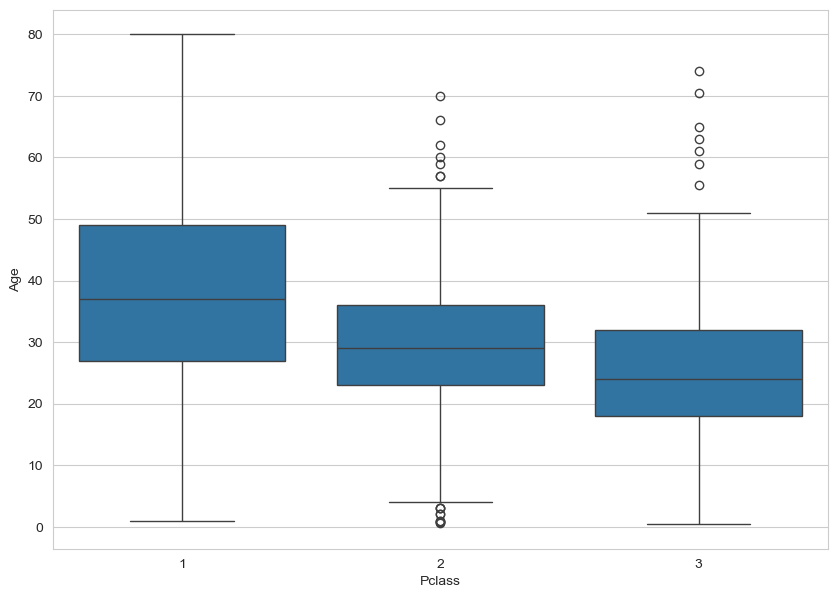

In [ ]:

plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)


In [76]:
def impute_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    
    # If Age is NaN, impute based on Pclass
    if pd.isna(Age):
        if Pclass == 1:
            return 37  # Assuming average age for Pclass 1
        elif Pclass == 2:
            return 29  # Assuming average age for Pclass 2
        else:
            return 24  # Assuming average age for Pclass 3
    else:
        return Age  # If Age is not missing, return the actual value


In [80]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [86]:
train['Age'].isna().sum()

0

<Axes: >

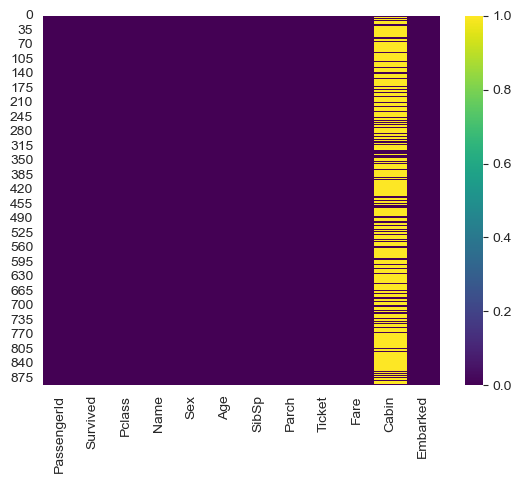

In [92]:
sns.heatmap(train.isna(),cmap='viridis')
# no issing ino in age

In [96]:
train.drop('Cabin',axis=1,inplace=True)

In [98]:
train.head()
# no cabin col

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

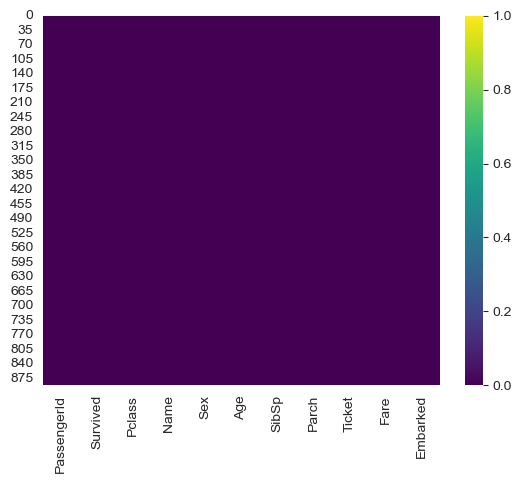

In [100]:
sns.heatmap(train.isna(),cmap='viridis')


In [102]:
# jitni bi missing value hai sb drop krdo
train.dropna(inplace=True)

In [104]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [107]:
pd.get_dummies(train['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [123]:
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [125]:
sex.head()

,male
0,True
1,False
2,False
3,False
4,True


In [127]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


In [ ]:
train=pd.concat([train,sex,embark],axis=1)

In [121]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [ ]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [133]:
# ab perfect data hogya hai ML ke hisab se
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True,True,False,True


In [ ]:

train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
886,887,0,2,27.00000,0,0,13.00,True,False,True,True,False,True
887,888,1,1,19.00000,0,0,30.00,False,False,True,False,False,True
888,889,0,3,25.14062,1,2,23.45,False,False,True,False,False,True
889,890,1,1,26.00000,0,0,30.00,True,False,False,True,False,False
890,891,0,3,32.00000,0,0,7.75,True,True,False,True,True,False


In [137]:
train.drop('PassengerId',axis=1,inplace=True)

In [139]:
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S
0,0,3,22.00000,1,0,7.2500,True,False,True,True,False,True
1,1,1,38.00000,1,0,71.2833,False,False,False,False,False,False
2,1,3,26.00000,0,0,7.9250,False,False,True,False,False,True
3,1,1,35.00000,1,0,53.1000,False,False,True,False,False,True
4,0,3,35.00000,0,0,8.0500,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.00000,0,0,13.0000,True,False,True,True,False,True
887,1,1,19.00000,0,0,30.0000,False,False,True,False,False,True
888,0,3,25.14062,1,2,23.4500,False,False,True,False,False,True
889,1,1,26.00000,0,0,30.0000,True,False,False,True,False,False


In [141]:
clas=pd.get_dummies(train['Pclass'])

In [143]:
clas.head()

,1,2,3
0,False,False,True
1,True,False,False
2,False,False,True
3,True,False,False
4,False,False,True


In [146]:
X=train.drop('Survived',axis=1)
y=train['Survived']

In [150]:
from sklearn.model_selection import train_test_split

In [152]:
train_test_split=X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [154]:
from sklearn.linear_model import LogisticRegression

In [156]:
logmodel=LogisticRegression()

In [160]:
logmodel.fit(X_train,y_train)

C:\Users\FatimaTasneem\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [162]:
predictions=logmodel.predict(X_test)

In [164]:
# ab classification or evaluation use krni hai

In [168]:
from sklearn.metrics import classification_report
# ye f1 recall prescioon sbka report dedega confusion matrix ki zarurat ni pregi

In [170]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [ ]:
from sklearn.metrics import confusion_matrix

In [174]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 33,  71]], dtype=int64)